In [150]:
%matplotlib notebook
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [151]:
df = pd.read_csv("new_train.csv", header=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10480 entries, 0 to 10479
Data columns (total 18 columns):
Homepage              10466 non-null float64
Homepage _Duration    10466 non-null float64
Aboutus               10466 non-null float64
Aboutus_Duration      10466 non-null float64
Contactus             10466 non-null float64
Contactus_Duration    10466 non-null float64
BounceRates           10466 non-null float64
ExitRates             10466 non-null float64
PageValues            10480 non-null float64
SpecialDay            10480 non-null float64
Month                 10480 non-null int64
OperatingSystems      10480 non-null int64
Browser               10480 non-null int64
Province              10480 non-null int64
TrafficType           10480 non-null int64
VisitorType           10480 non-null int64
Weekend               10480 non-null int64
Revenue               10480 non-null int64
dtypes: float64(10), int64(8)
memory usage: 1.4 MB


In [152]:
df=df.dropna()

In [154]:

a=['Homepage', 'Homepage _Duration', 'Aboutus', 'Aboutus_Duration',
       'Contactus', 'Contactus_Duration', 'BounceRates', 'ExitRates',
       'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser',
       'Province', 'TrafficType', 'VisitorType', 'Weekend']

X = df[a]
y = df['Revenue']
y.shape

(10466,)

In [155]:
from sklearn import preprocessing
X = preprocessing.scale(X)

In [196]:
x_train, x_validation, y_train, y_validation = train_test_split(X, y, test_size = 0.2)

In [206]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.regularizers import l2

In [219]:
model = Sequential()
model.add(Dense(128, activation="relu", input_shape = (x_train.shape[1],))) # Hidden Layer 1 that receives the Input from the Input Layer

model.add(Dense(64, kernel_regularizer=l2(0.01),bias_regularizer=l2(0.01), activation="relu")) # Hidden Layer 2
# model.add(Dropout(0.2))

model.add(Dense(32, kernel_regularizer=l2(0.01),bias_regularizer=l2(0.01) ,activation="relu")) # Hidden Layer 3
# model.add(Dropout(0.2))

model.add(Dense(16, kernel_regularizer=l2(0.01),bias_regularizer=l2(0.01),activation="relu")) # Hidden Layer 4
# model.add(Dropout(0.2))


model.add(Dense(1, activation="sigmoid")) # Outout Layer

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_78 (Dense)             (None, 128)               2304      
_________________________________________________________________
dense_79 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_80 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_81 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_82 (Dense)             (None, 1)                 17        
Total params: 13,185
Trainable params: 13,185
Non-trainable params: 0
_________________________________________________________________


In [220]:
model.compile(optimizer='adam', loss = "binary_crossentropy", metrics = ['accuracy'])

In [231]:
history=model.fit(x_train, y_train,validation_split=0.33, batch_size = 64, epochs = 20)

Train on 5609 samples, validate on 2763 samples
Epoch 1/20
5609/5609 [==============================] - 0s 33us/step - loss: 0.2449 - acc: 0.9098 - val_loss: 0.2894 - val_acc: 0.8893
Epoch 2/20
5609/5609 [==============================] - 0s 29us/step - loss: 0.2440 - acc: 0.9094 - val_loss: 0.2825 - val_acc: 0.8874
Epoch 3/20
5609/5609 [==============================] - 0s 29us/step - loss: 0.2431 - acc: 0.9080 - val_loss: 0.2906 - val_acc: 0.8835
Epoch 4/20
5609/5609 [==============================] - 0s 29us/step - loss: 0.2414 - acc: 0.9103 - val_loss: 0.2834 - val_acc: 0.8896
Epoch 5/20
5609/5609 [==============================] - 0s 26us/step - loss: 0.2421 - acc: 0.9073 - val_loss: 0.2817 - val_acc: 0.8871
Epoch 6/20
5609/5609 [==============================] - 0s 26us/step - loss: 0.2403 - acc: 0.9107 - val_loss: 0.2859 - val_acc: 0.8907
Epoch 7/20
5609/5609 [==============================] - 0s 27us/step - loss: 0.2400 - acc: 0.9100 - val_loss: 0.2874 - val_acc: 0.8845
Epoch 8

In [232]:
test_loss, test_acc = model.evaluate(x_validation, y_validation)

2094/2094 [==============================] - 0s 31us/step


In [233]:
print('Test accuracy:', test_acc)

Test accuracy: 0.899235912129895


In [234]:
print('Test lost:', test_loss)

Test lost: 0.2753463666583656


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


<IPython.core.display.Javascript object>


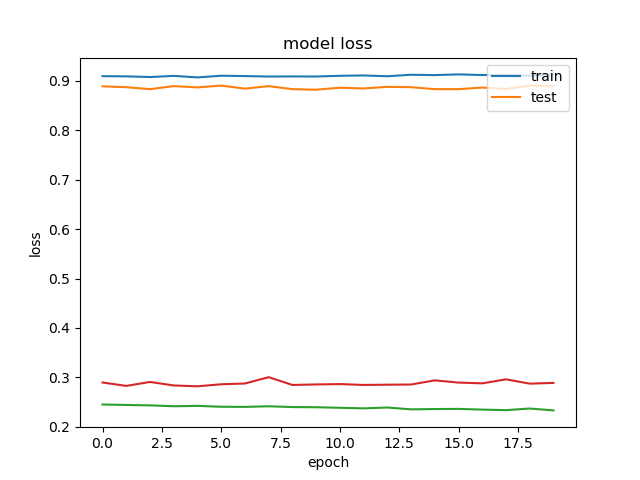

In [235]:
print(history.history.keys())

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()